In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import Imputer

import copy
import argparse

%matplotlib inline

In [3]:
ames_train = pd.read_csv('./datasets/train.csv')
ames_test = pd.read_csv('./datasets/test.csv')
ames_test_1 = pd.read_csv('./datasets/test.csv')
print(ames_train.shape)
print(ames_test.shape)

(2051, 81)
(879, 80)


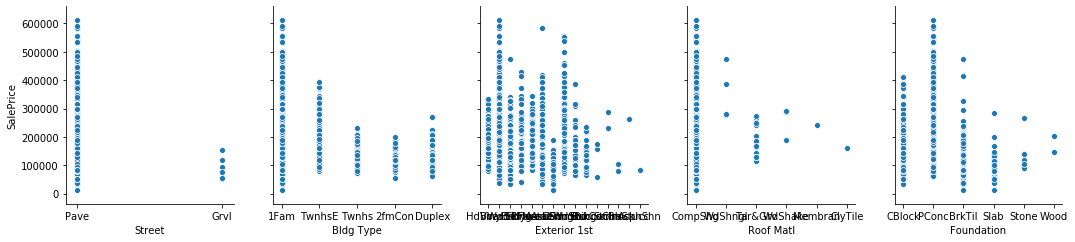

In [20]:

pp = sns.pairplot(data=ames_train,
                  x_vars=['Street', 'Bldg Type', 'Exterior 1st', 'Roof Matl', 'Foundation'],
                  y_vars=['SalePrice'])
pp.fig.set_size_inches(15,4)



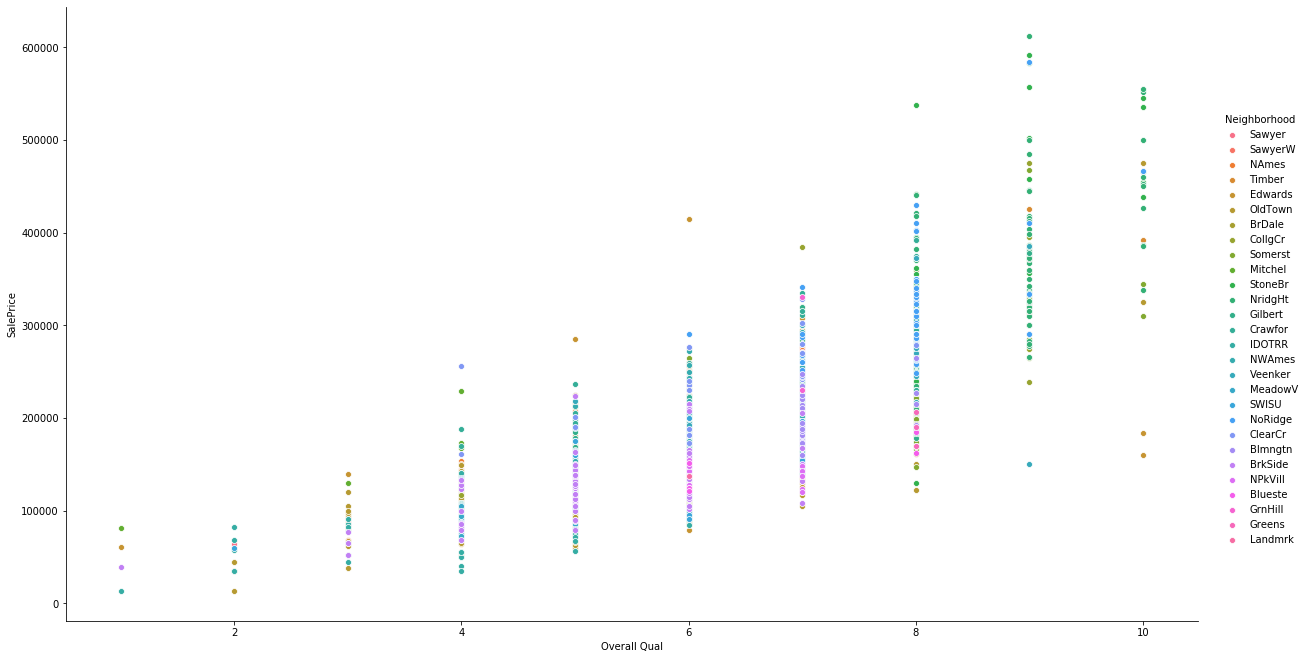

In [85]:
pp = sns.pairplot(data=ames_train,
        x_vars=['Overall Qual'],
        y_vars=['SalePrice'], hue='Neighborhood', height=15);
pp.fig.set_size_inches(18, 9);

#  'Gr Liv Area', 'TotRms AbvGrd', '1st Flr SF', 'Year Built'

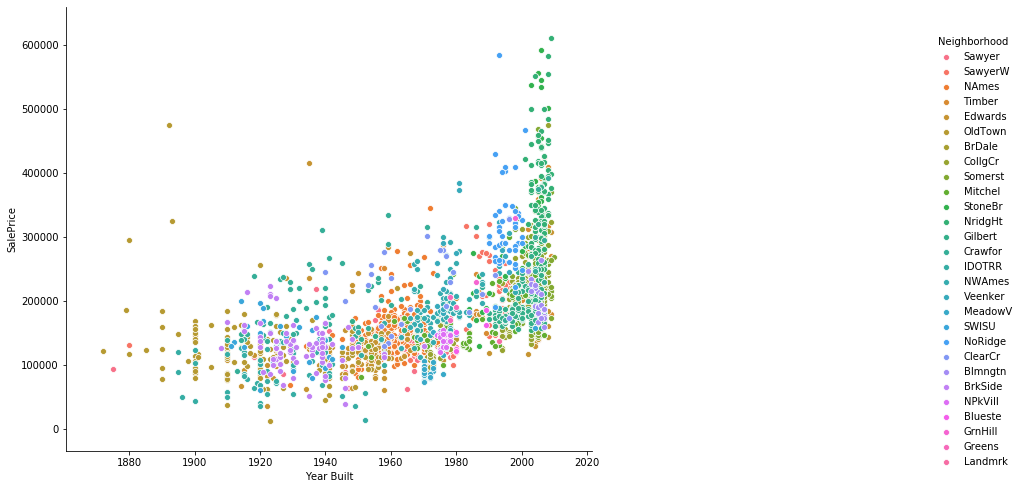

In [68]:
pp = sns.pairplot(data=ames_train,
                  x_vars=['Year Built'],
                  y_vars=['SalePrice'], hue='Neighborhood');
pp.fig.set_size_inches(18, 9);

#  'Gr Liv Area', 'TotRms AbvGrd', '1st Flr SF', 'Year Built'

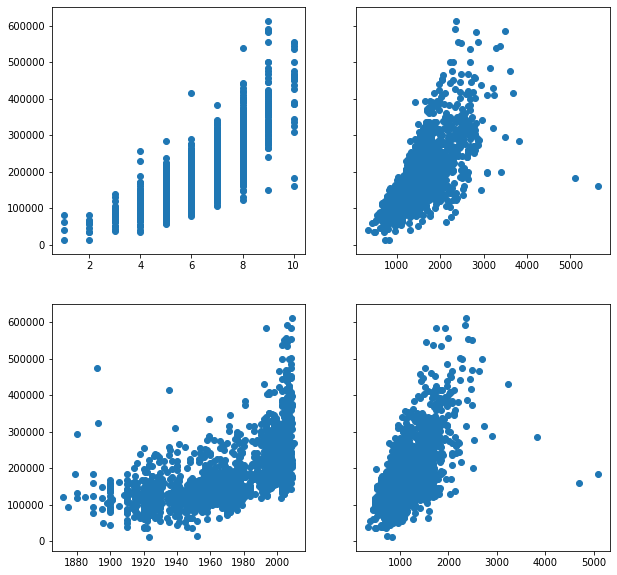

In [74]:
f, ax = plt.subplots(2, 2, sharey=True, figsize=(10,10))
ax[0,0].scatter(ames_train['Overall Qual'], ames_train['SalePrice'])
# ax.set_title('Sharing Y axis')
ax[0,1].scatter(ames_train['Gr Liv Area'], ames_train['SalePrice'], )
ax[1,0].scatter(ames_train['Year Built'], ames_train['SalePrice'], )
ax[1,1].scatter(ames_train['1st Flr SF'], ames_train['SalePrice'], )

plt.show()


In [ ]:
sns.pairplot(df, x_vars=['Accept', 'Enroll', 'F.Undergrad'], y_vars=['Apps'], kind='reg');
sns.boxplot(df.Apps)

In [ ]:
ames_train['base_1st'] = ames_train['Total Bsmt SF'] * ames_train['1st Flr SF']
ames_test['base_1st'] = ames_test['Total Bsmt SF'] * ames_test['1st Flr SF']

In [ ]:
ames_train['quality_year'] = ames_train['Overall Qual'] * ames_train['Year Built']
ames_test['quality_year'] = ames_test['Overall Qual'] * ames_test['Year Built']

In [ ]:
ames_train['quality_sq_ft'] = ames_train['Overall Qual'] * ames_train['1st Flr SF']
ames_test['quality_sq_ft'] = ames_test['Overall Qual'] * ames_test['1st Flr SF']

In [ ]:
ames_train['garage_area_cars'] = ames_train['Garage Area'] * ames_train['Garage Cars']
ames_test['garage_area_cars'] = ames_test['Garage Area'] * ames_test['Garage Cars']

In [ ]:
ames_train['qual_neig'] = ames_train['Neighborhood'] * ames_train['Overall Qual']
ames_test['qual_neig'] = ames_test['Neighborhood'] * ames_test['Overall Qual']

In [ ]:
ames_train['Quality_sq'] = ames_train['Overall Qual'] * ames_train['Overall Qual']
ames_test['Quality_sq'] = ames_test['Overall Qual'] * ames_test['Overall Qual']

In [ ]:
ames_train['GLA_OQ'] = ames_train['Gr Liv Area'] * ames_train['Overall Qual']
ames_test['GLA_OQ'] = ames_test['Gr Liv Area'] * ames_test['Overall Qual']

In [ ]:
ames_train['GLA_SQ'] = ames_train['Gr Liv Area'] * ames_train['Gr Liv Area']
ames_test['GLA_SQ'] = ames_test['Gr Liv Area'] * ames_test['Gr Liv Area']

In [ ]:
ames_train['Yr_brm'] = ames_train['Year Built'] * ames_train['Year Remod/Add']
ames_test['Yr_brm'] = ames_test['Year Built'] * ames_test['Year Remod/Add']

In [ ]:
ames_train['GLA_Bath'] = ames_train['Gr Liv Area'] * ames_train['Full Bath']
ames_test['GLA_Bath'] = ames_test['Gr Liv Area'] * ames_test['Full Bath']

In [ ]:
# ames_train['neig_sq_ft'] = ames_train['Neighborhood'] * ames_train['1st Flr SF']
# ames_test['neig_sq_ft'] = ames_test['Neighborhood'] * ames_test['1st Flr SF']

In [ ]:
# ames_train._get_numeric_data
ames_test.fillna(ames_test.mean(), inplace=True)
ames_test.fillna('no_value_reported', inplace=True)

In [ ]:
ames_test.columns

In [ ]:
tested_col = [
            'Overall Qual',
            '1st Flr SF',
            'Gr Liv Area',
            'TotRms AbvGrd',
            'garage_area_cars',
            'quality_year',
            'quality_sq_ft',
            'qual_neig',
            'Quality_sq',
            'GLA_OQ',
            'GLA_Bath',
            'Neighborhood',
            'Bldg Type',
            'Exterior 1st',
            
            
            ]

In [ ]:
ames_train.corr()[['SalePrice']].sort_values('SalePrice', ascending=False)

In [ ]:
corr_1 = ames_train[[
            'Overall Qual',
            'Yr_brm',
            'Total Bsmt SF', 
            '1st Flr SF',
            'Gr Liv Area',
            'Full Bath',
            'TotRms AbvGrd',
            'garage_area_cars',
            'quality_year',
            'quality_sq_ft',
            'qual_neig',
            'Quality_sq',
            'GLA_OQ',
            'GLA_Bath',
            'Neighborhood',
            'Bldg Type',
            'Exterior 1st',
            'SalePrice']].corr()
corr_2 = ames_train[[
            'Overall Qual',
            'Yr_brm',
            '1st Flr SF',
            'Gr Liv Area',
            'Full Bath',
            'garage_area_cars',
            'quality_year',
            'quality_sq_ft',
            'SalePrice']]

In [ ]:
plt.figure(figsize = (40, 35))
plt.xticks(rotation=45)
mask = np.zeros_like(corr_1)
mask[np.triu_indices_from(mask)] = True
sns.set(font_scale = 2)
ax = sns.heatmap(corr_1, mask=mask, annot=True, cmap='Spectral', vmax=1, vmin=-1,
            square=False, linewidths=1.5,  cbar_kws={"shrink": 1.0}, xticklabels='auto')


In [ ]:
sns.pairplot(ames_train, y_vars = corr_2, x_vars = corr_2);

In [ ]:
# # Creating a function that makes a power variable (feature) and puts that feature in a dataframe.
# def new_variable(series_1, series_2, series_name, df):
#     df[series_name] = series_1 * series_2
#     return df

In [ ]:
def dropped_cols(df, tested_col):
    dropped_col = []
    for col in df:
        if col not in tested_col:
            dropped_col.append(col)
    return dropped_col  


def dummy_vars_list(df, tested_cols):
    dummy_vars_list = []
    for col in tested_cols:
        if df[col].dtype.name == 'object':
            dummy_vars_list.append(col)
    return dummy_vars_list            
    


def get_dummies(train, test, columns, drop_first=True,
                inplace=False):
    if not inplace:
        train = copy.deepcopy(train)
        test = copy.deepcopy(test)
        

    for column in columns:
        train_levels = set(train[column])
        test_levels = set(test[column])
        all_levels = sorted(train_levels.union(test_levels))
        if drop_first:
            all_levels = all_levels[1:]
        for level in all_levels:
            dummy_name = "%s_is_%s" % (column, level)
            train[dummy_name] = (train[column] == level) # Could be replaced with an if statement
            test[dummy_name] = (test[column] == level)
    train.drop(columns=columns, inplace=True)
    test.drop(columns=columns, inplace=True)

    
    # return only necessary if inplace=False
    return (train, test)

def check_compatibility(train, test):
    # assume compatible unless one of these checks fails
    if not (len(train.columns) == len(test.columns)):
        return False
    for column in train.columns:
        if not (column in test.columns):
            return False
    return True


def clean_data(train, test, columns_to_drop,
               columns_for_dummies, remove_na=True,
               drop_first=True, inplace=False):
    if not inplace:
        train = copy.deepcopy(train)
        test = copy.deepcopy(test)
  
    # inplace=True because if user called with inplace=False,
    # we already made a copy and aren't modifying his/her original
    train.drop(columns=columns_to_drop, inplace=True)
    test.drop(columns=columns_to_drop, inplace=True)
  

#     same reason as above for inplace=True
    if remove_na:
        train.dropna(inplace=True)
        test.dropna(inplace=True)


    (train, test) = get_dummies(train, test,
                                columns=columns_for_dummies,
                                drop_first=drop_first,
                                inplace=inplace)
    

    return (train, test)


###################

def patrick_clean_data(train_df, test_df, variables, remove_na=True, drop_first=True, inplace=False):
    columns_to_drop = dropped_cols(test_df, variables)
    dummy_columns = dummy_vars_list(test_df, variables)
    new_train, new_test = clean_data(train_df, test_df, 
                                     columns_to_drop, 
                                     dummy_columns, 
                                     remove_na=remove_na, 
                                     drop_first=drop_first, 
                                     inplace=inplace)
    
    y_col_name = []
    for col in new_train.columns:
        if col not in new_test.columns:
            y = new_train[col]
            y_col_name = col
    new_train = new_train.drop(y_col_name, axis=1)
    
    assert check_compatibility(new_train, new_test)
    
#     for column in new_test.columns: # Turn this on if I want to see what columns were made
#         print(column)

    return new_train, new_test, y

In [ ]:
new_train, new_test, y = patrick_clean_data(ames_train, ames_test, tested_col)
print(new_test.shape)
print(new_train.shape)
print(y.shape)

In [ ]:
def metrics_summary(X, y, test_set, cv, k, scaled=True, poly=False, n_alphas=100):
    
    if poly!=poly:
        poly = PolynomialFeatures(degree=2, include_bias=False)
        X = poly.fit_transform(X)
        
    else:
        
        # Scaling our data
        ss = StandardScaler()
        X_sc = ss.fit_transform(X)
        test_sc = ss.transform(test_set)

        # Instantiating our models
        model = LinearRegression()
        lasso = LassoCV(n_alphas=n_alphas, cv=5)    
        ridge = RidgeCV(cv=5)

        # Fitting our models on non-scaled and scaled data
        model.fit(X,y)
        model.fit(X_sc, y)
        lasso.fit(X_sc, y)
        ridge.fit(X_sc, y)

        # Running the predictions on our model
        model_p = model.predict(X)
        model_pred = model.predict(X_sc)
        lasso_pred = lasso.predict(X_sc)
        ridge_pred = ridge.predict(X_sc)

        resids_lr = y - model_p
        resids_lr_sc = y - model_pred
        resids_lasso = y - lasso_pred
        resids_ridge = y - ridge_pred

        rss_lr = (resids_lr ** 2).sum()
        rss_lr_sc = (resids_lr_sc ** 2).sum()
        rss_lasso = (resids_lasso ** 2).sum()
        rss_ridge = (resids_ridge ** 2).sum()

        r_squared = (metrics.r2_score(y, model_p))
        adj_r2 = 1 - (1-r_squared)*((len(y)-1)/(len(y)-X.shape[k]-1))

        # Running cross value scores
        cvs = cross_val_score(model, X_sc, y, cv=cv).mean()
        cvs_l = cross_val_score(lasso, X_sc, y, cv=cv).mean()
        cvs_r = cross_val_score(ridge, X_sc, y, cv=cv).mean()

        print(f'RSS (Residual Sum of Squares) : {(rss_lr)}')
        print(f'MAE (Mean Absolute Error) : {(metrics.mean_absolute_error(y, model_p))}') 
        print(f'MSE (Mean Square Error) : {(metrics.mean_squared_error(y, model_p))}')
        print()
        print(f'Root MSE (Root Meen Square Error Linear Non-Scaled) : {(np.sqrt(rss_lr / len(model_p)))}')
        print(f'Root MSE (Root Meen Square Error Linear Scaled) : {(np.sqrt(rss_lr_sc / len(model_pred)))}')
        print(f'Root MSE (Root Meen Square Error Lasso) : {(np.sqrt(rss_lasso / len(lasso_pred)))}')
        print(f'Root MSE (Root Meen Square Error Ridge) : {(np.sqrt(rss_ridge / len(ridge_pred)))}')
        print()
        print(f'R\u00b2 : {(r_squared)}')
        print(f'Adjusted R\u00b2 : {(adj_r2)}')
        print()
        print(f'CVS (Cross Value Score LR) : {(cvs)}')
        print(f'CVS (Cross Value Score Lasso) : {(cvs_l)}')
        print(f'CVS (Cross Value Score Ridge) : {(cvs_r)}')

        model.fit(X_sc, y)
        model_pred_final = model.predict(test_sc)
        lasso.fit(X_sc, y)
        lasso_pred_final = lasso.predict(test_sc)
        ridge.fit(X_sc, y)
        ridge_pred_final = ridge.predict(test_sc)

        if (cvs > cvs_l) and (cvs > cvs_r):
            prediction = pd.DataFrame(model_pred_final, columns=['SalePrice']).to_csv('wd_prediction_{}.csv'.format(new_argument))
        elif (cvs_l > cvs) and (cvs_l > cvs_r):
            prediction = pd.DataFrame(lasso_pred_final, columns=['SalePrice']).to_csv('wd_prediction_11.csv')
        elif (cvs_r > cvs_l) and (cvs_r > cvs):
            prediction = pd.DataFrame(ridge_pred_final, columns=['SalePrice']).to_csv('wd_prediction_11.csv')
        return prediction


In [ ]:
metrics_summary(new_train, y, new_test, 5, 1, scaled=True, poly=False)